### "Amazon-Alexa" text classification using "Bag of Words and "TF-IDF" ( w/ spacy and sklearn pipelines )

#### https://www.kaggle.com/datasets/sid321axn/amazon-alexa-reviews

In [ ]:
# install the following if they are not installed yet !

!pip install spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 23.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


### import the required libraries

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline

### Load the input data ( "amazon alexa reviews data")

In [ ]:
# Loading TSV file
df_amazon = pd.read_csv ("amazon_alexa.tsv", sep="\t")

In [ ]:
# Top 5 records
df_amazon.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


### Data Exploration

In [ ]:
df_amazon.columns.tolist()

['rating', 'date', 'variation', 'verified_reviews', 'feedback']

In [ ]:
# shape of dataframe
df_amazon.shape

(3150, 5)

In [ ]:
df_amazon.feedback.unique()

array([1, 0])

In [ ]:
df_amazon['feedback'].value_counts()

feedback
1    2893
0     257
Name: count, dtype: int64

In [ ]:
df_amazon.rating.unique()

array([5, 4, 3, 2, 1])

In [ ]:
df_amazon['rating'].value_counts()

rating
5    2286
4     455
1     161
3     152
2      96
Name: count, dtype: int64

In [ ]:
# View data information
df_amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


### Checking the missing values

In [ ]:
df_amazon.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64

### Basic summary statistics

In [ ]:
df_amazon.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [ ]:

df_amazon['verified_reviews'] = df_amazon['verified_reviews'].fillna('')


df_amazon['length'] = df_amazon['verified_reviews'].apply(len)
df_amazon.shape


(3150, 6)

### Visual exploration of data

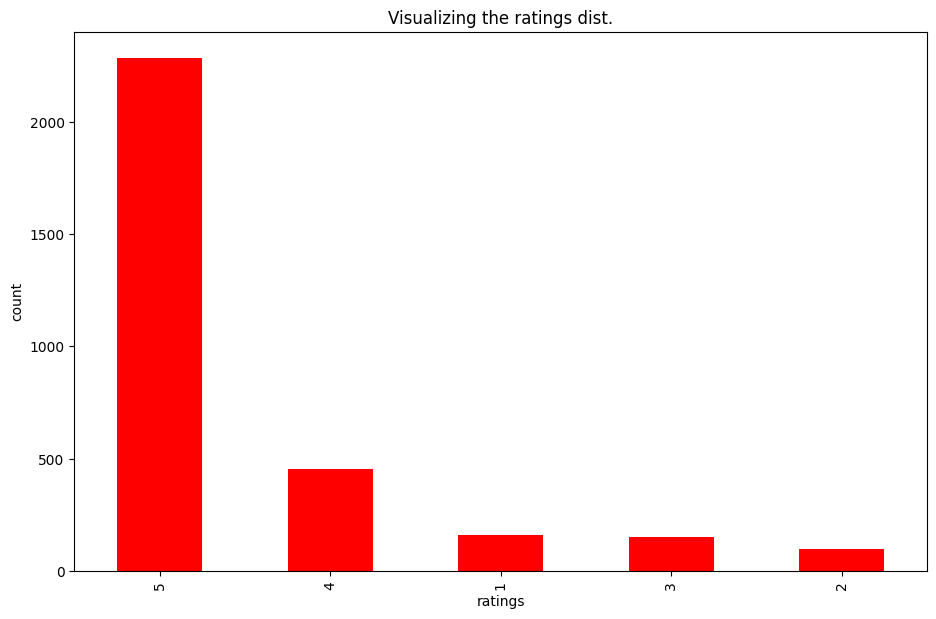

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df_amazon['rating'].value_counts().plot.bar(color = 'red',figsize = (11, 7))
plt.title('Visualizing the ratings dist.')
plt.xlabel('ratings')
plt.ylabel('count')
plt.show()

In [ ]:
df_amazon['rating'].value_counts()

rating
5    2286
4     455
1     161
3     152
2      96
Name: count, dtype: int64

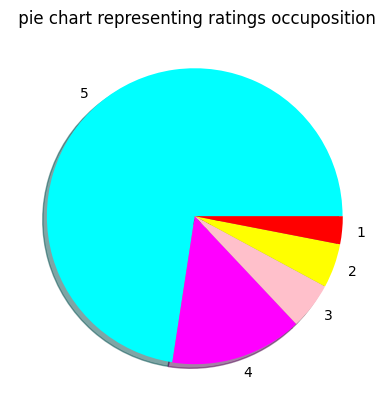

In [ ]:
labels = '5', '4', '3', '2', '1'
sizes = [2286, 455, 161, 152, 96]
colors = ['cyan', 'magenta', 'pink', 'yellow', 'red']
explode = [0.001, 0.001, 0.001, 0.001, 0.001]
plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True)
plt.title(' pie chart representing ratings occuposition')
plt.show()

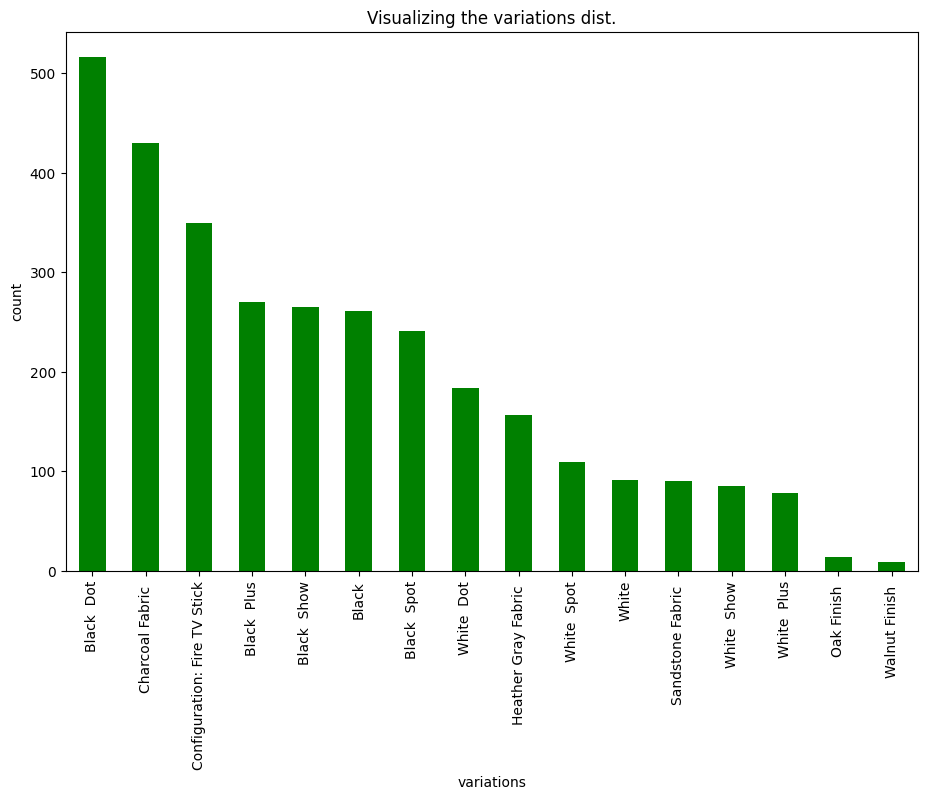

In [ ]:
df_amazon['variation'].value_counts().plot.bar(color = 'green', figsize = (11, 7))
plt.title('Visualizing the variations dist.')
plt.xlabel('variations')
plt.ylabel('count')
plt.show()

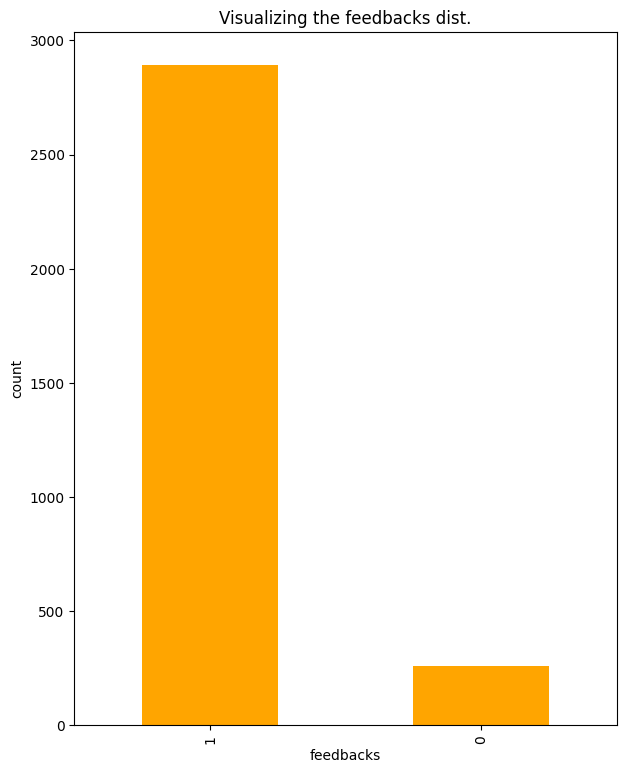

In [ ]:
df_amazon['feedback'].value_counts().plot.bar(color = 'orange', figsize = (7, 9))
plt.title('Visualizing the feedbacks dist.')
plt.xlabel('feedbacks')
plt.ylabel('count')
plt.show()

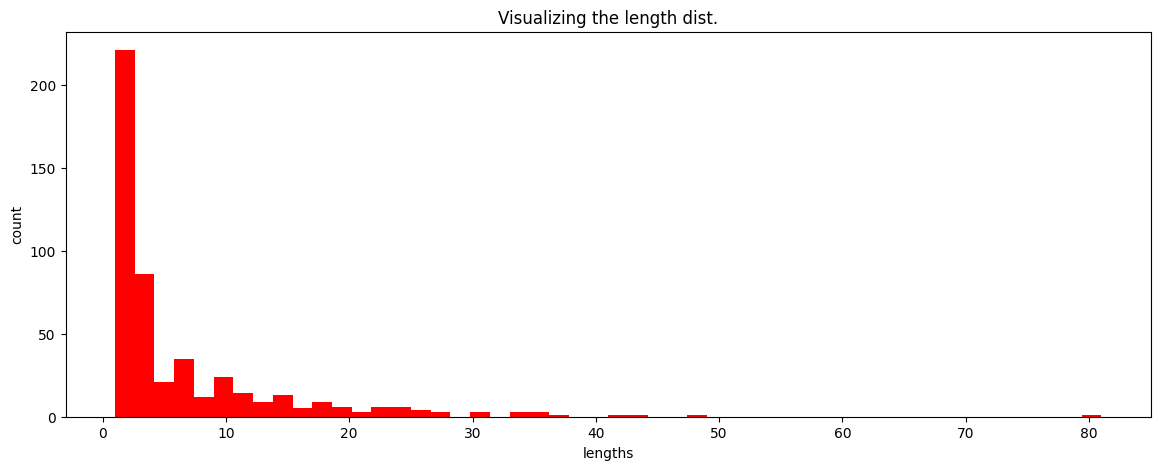

In [ ]:
df_amazon['length'].value_counts().plot.hist(color = 'red', figsize = (14, 5), bins = 50)
plt.title('Visualizing the length dist.')
plt.xlabel('lengths')
plt.ylabel('count')
plt.show()

In [ ]:
df_amazon[df_amazon['length'] == 50]['verified_reviews'].iloc[0]

'Yet another Exho for our home and love them all!!!'

In [ ]:
df_amazon.date.describe()

count          3150
unique           77
top       30-Jul-18
freq           1603
Name: date, dtype: object

In [ ]:
df_amazon.groupby('variation').mean()[['rating']].plot.bar(color = 'green', figsize=(14, 6))
plt.title("Variation wise Mean Ratings")
plt.xlabel('variatiions')
plt.ylabel('ratings')
plt.show()



TypeError: Could not convert 31-Jul-1830-Jul-1830-Jul-1830-Jul-1830-Jul-1830-Jul-1830-Jul-1829-Jul-1829-Jul-1829-Jul-1828-Jul-1828-Jul-1828-Jul-1828-Jul-1828-Jul-1827-Jul-1827-Jul-1827-Jul-1827-Jul-1826-Jul-1826-Jul-1826-Jul-1826-Jul-1825-Jul-1825-Jul-1825-Jul-1825-Jul-1824-Jul-1824-Jul-1824-Jul-1824-Jul-1823-Jul-1823-Jul-1821-Jul-1820-Jul-1819-Jul-1818-Jul-1818-Jul-1818-Jul-1818-Jul-1817-Jul-1817-Jul-1816-Jul-1815-Jul-1813-Jul-1813-Jul-1813-Jul-1813-Jul-1813-Jul-1813-Jul-1812-Jul-1812-Jul-1811-Jul-1811-Jul-1811-Jul-1811-Jul-1810-Jul-1810-Jul-189-Jul-189-Jul-189-Jul-189-Jul-189-Jul-189-Jul-188-Jul-188-Jul-187-Jul-187-Jul-187-Jul-187-Jul-187-Jul-186-Jul-185-Jul-185-Jul-185-Jul-185-Jul-185-Jul-184-Jul-183-Jul-183-Jul-182-Jul-182-Jul-182-Jul-182-Jul-182-Jul-182-Jul-181-Jul-181-Jul-181-Jul-181-Jul-181-Jul-181-Jul-1830-Jun-1830-Jun-1829-Jun-1828-Jun-1828-Jun-1828-Jun-1827-Jun-1827-Jun-1827-Jun-1827-Jun-1827-Jun-1827-Jun-1826-Jun-1826-Jun-1826-Jun-1826-Jun-1826-Jun-1826-Jun-1825-Jun-1825-Jun-1825-Jun-1825-Jun-1825-Jun-1825-Jun-1825-Jun-1825-Jun-1824-Jun-1824-Jun-1824-Jun-1824-Jun-1824-Jun-1823-Jun-1823-Jun-1823-Jun-1822-Jun-1821-Jun-1821-Jun-1821-Jun-1821-Jun-1821-Jun-1821-Jun-1821-Jun-1820-Jun-1820-Jun-1820-Jun-1819-Jun-1819-Jun-1818-Jun-1817-Jun-1817-Jun-1817-Jun-1816-Jun-1816-Jun-1815-Jun-1815-Jun-1814-Jun-1814-Jun-1814-Jun-1814-Jun-1814-Jun-1814-Jun-1814-Jun-1813-Jun-1812-Jun-1812-Jun-1812-Jun-1812-Jun-1812-Jun-1812-Jun-1812-Jun-1811-Jun-1811-Jun-1811-Jun-1811-Jun-1811-Jun-1811-Jun-1811-Jun-1811-Jun-1811-Jun-1810-Jun-1810-Jun-1810-Jun-1810-Jun-1810-Jun-1810-Jun-1810-Jun-189-Jun-188-Jun-188-Jun-188-Jun-187-Jun-187-Jun-187-Jun-187-Jun-186-Jun-186-Jun-186-Jun-186-Jun-186-Jun-185-Jun-185-Jun-185-Jun-185-Jun-185-Jun-183-Jun-183-Jun-183-Jun-183-Jun-183-Jun-183-Jun-182-Jun-182-Jun-181-Jun-1831-May-1831-May-1831-May-1831-May-1831-May-1831-May-1830-May-1830-May-1829-May-1828-May-1828-May-1828-May-1828-May-1828-May-1827-May-1827-May-1827-May-1827-May-1827-May-1827-May-1827-May-1827-May-1826-May-1826-May-1825-May-1825-May-1825-May-1824-May-1824-May-1824-May-1824-May-1823-May-1823-May-1823-May-1821-May-1820-May-1820-May-1820-May-1820-May-1819-May-1819-May-1819-May-1818-May-1818-May-1818-May-1817-May-1817-May-1817-May-1817-May-1817-May-1817-May-1816-May-1816-May-1816-May-1816-May-185-Jul-18 to numeric

In [ ]:
df_amazon.groupby('feedback').mean()[['rating']].plot.bar(color = 'crimson', figsize=(5, 4))
plt.title("feedback wise Mean Ratings")
plt.xlabel('feedbacks')
plt.ylabel('ratings')
plt.show()

TypeError: Could not convert 30-Jul-1830-Jul-1830-Jul-1830-Jul-1830-Jul-1829-Jul-1829-Jul-1829-Jul-1829-Jul-1828-Jul-1831-Jul-1829-Jul-1828-Jul-1828-Jul-1827-Jul-1826-Jul-1826-Jul-1825-Jul-1825-Jul-1824-Jul-1822-Jul-1820-Jul-1819-Jul-1816-Jul-1813-Jul-1812-Jul-1811-Jul-189-Jul-181-Jul-1829-Jun-1828-Jun-1826-Jun-1825-Jun-1824-Jun-1821-Jun-1820-Jun-1820-Jun-1819-Jun-1815-Jun-1814-Jun-1814-Jun-1812-Jun-1812-Jun-1812-Jun-1811-Jun-1811-Jun-1810-Jun-1810-Jun-186-Jun-185-Jun-183-Jun-1831-May-1831-May-1831-May-1830-May-1826-May-1824-May-1824-May-1823-May-1822-May-1821-May-1821-May-1830-Jul-1830-Jul-1830-Jul-1830-Jul-1830-Jul-1829-Jul-1829-Jul-1829-Jul-1829-Jul-1828-Jul-1830-Jul-1830-Jul-1830-Jul-1830-Jul-1830-Jul-1830-Jul-1829-Jul-1829-Jul-1829-Jul-1829-Jul-1828-Jul-1828-Jul-1828-Jul-1827-Jul-1826-Jul-1826-Jul-1826-Jul-1826-Jul-1826-Jul-1826-Jul-1825-Jul-1824-Jul-1824-Jul-1824-Jul-1823-Jul-1823-Jul-1823-Jul-1823-Jul-1822-Jul-1822-Jul-1822-Jul-1821-Jul-1819-Jul-1819-Jul-1819-Jul-1819-Jul-1819-Jul-1819-Jul-1817-Jul-1817-Jul-1817-Jul-1817-Jul-1816-Jul-1815-Jul-1830-Jul-1830-Jul-1830-Jul-1830-Jul-1830-Jul-1830-Jul-1830-Jul-1830-Jul-1830-Jul-1830-Jul-1830-Jul-1830-Jul-1829-Jul-1829-Jul-1829-Jul-1829-Jul-1829-Jul-1829-Jul-1829-Jul-1829-Jul-1829-Jul-1829-Jul-1829-Jul-1828-Jul-1828-Jul-1828-Jul-1828-Jul-1828-Jul-1828-Jul-1830-Jul-1829-Jul-1829-Jul-1827-Jul-1827-Jul-1827-Jul-1827-Jul-1826-Jul-1826-Jul-1826-Jul-1826-Jul-1826-Jul-1826-Jul-1826-Jul-1825-Jul-1825-Jul-1824-Jul-1824-Jul-1824-Jul-1823-Jul-1823-Jul-1822-Jul-1821-Jul-1821-Jul-1820-Jul-1820-Jul-1820-Jul-1820-Jul-1819-Jul-1819-Jul-1819-Jul-1814-Jul-1814-Jul-185-Jul-1829-Jun-1829-Jun-1831-Jul-1831-Jul-1830-Jul-1830-Jul-1830-Jul-1830-Jul-1830-Jul-1830-Jul-1830-Jul-1830-Jul-1830-Jul-1830-Jul-1830-Jul-1830-Jul-1830-Jul-1830-Jul-1830-Jul-1830-Jul-1830-Jul-1830-Jul-1830-Jul-1830-Jul-1830-Jul-1830-Jul-1830-Jul-1830-Jul-1830-Jul-1830-Jul-1830-Jul-1830-Jul-1830-Jul-1830-Jul-1830-Jul-1830-Jul-1830-Jul-1830-Jul-1830-Jul-1830-Jul-1830-Jul-1830-Jul-1830-Jul-1830-Jul-1830-Jul-1830-Jul-1830-Jul-1830-Jul-1830-Jul-1830-Jul-1830-Jul-1830-Jul-1830-Jul-1830-Jul-1830-Jul-1830-Jul-1830-Jul-1830-Jul-1830-Jul-1830-Jul-1830-Jul-1830-Jul-1830-Jul-1830-Jul-1830-Jul-1830-Jul-1830-Jul-1830-Jul-1830-Jul-1830-Jul-1830-Jul-1830-Jul-1830-Jul-1830-Jul-1830-Jul-1830-Jul-1830-Jul-1830-Jul-18 to numeric

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 20')

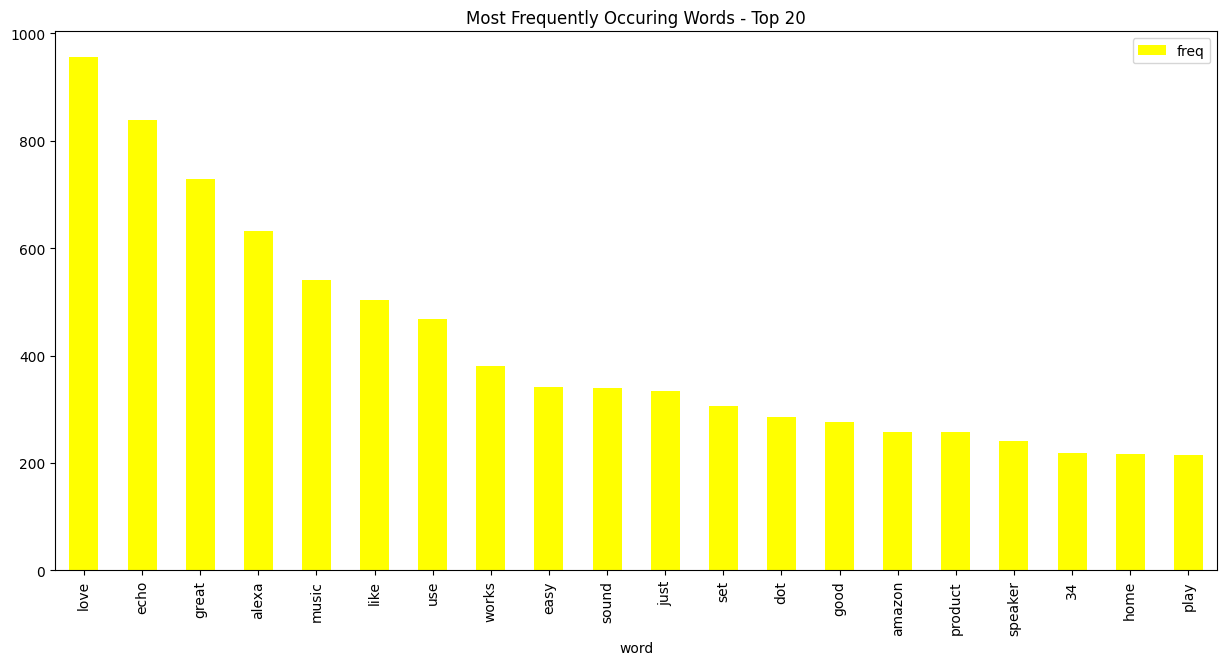

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(df_amazon.verified_reviews)
sum_words = words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'yellow')
plt.title("Most Frequently Occuring Words - Top 20")

In [ ]:
df_amazon.feedback.value_counts()

feedback
1    2893
0     257
Name: count, dtype: int64

In [ ]:
import string
import spacy

from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

# Create our list of punctuation marks
punctuations = string.punctuation

# Create our list of stopwords
nlp = spacy.load('en_core_web_sm')
stop_words = spacy.lang.en.stop_words.STOP_WORDS

In [ ]:
print(stop_words)

{'show', 'as', 'several', 'ca', 'yourself', 'are', 'anyhow', 'former', 'using', 'bottom', '‘m', 'together', 'other', 'both', 'and', 'will', 'hereupon', 'beforehand', 'fifteen', 'everything', 'out', 'be', 'eight', 'what', 'say', 'forty', 'there', 'another', 'one', 'go', 'above', 'must', '‘ve', 'beside', 'between', 'please', 'whole', 'with', 'may', 'something', 'toward', "'ll", 'make', 'very', 'when', 'your', 'seems', 'elsewhere', 'afterwards', 'hence', 'that', 'thereafter', 'itself', 'becoming', 'though', 'me', 'whereby', 'wherever', 'themselves', "'s", "'ve", 'five', 'well', 'moreover', 'of', 'whence', 'during', 'all', 'also', '’s', 'these', 'am', 'myself', 'hereby', 'then', 'thereby', 'nor', 'front', 'ten', 'whither', 'empty', 'she', 'per', 'sixty', "'d", 'get', 'i', 'last', 'besides', 'our', 'ours', 'latter', 'top', 'thereupon', 'over', '‘re', 'from', 'because', 'here', '‘d', 'would', 'always', "n't", 'therefore', 'sometime', 'do', 'seemed', 'since', 'a', 'latterly', 'never', 'throug

In [ ]:
# Creating our tokenizer function
def spacy_tokenizer(sentence):

    """This function will accepts a sentence as input and processes the sentence into tokens, performing lemmatization,
    lowercasing, removing stop words and punctuations."""

    # Creating our token object, which is used to create documents with linguistic annotations.
    #mytokens = parser(sentence)
    mytokens = nlp(sentence)
    #print(mytokens)

    # Lemmatizing each token and converting each token into lowercase
    # Note that spaCy uses '-PRON-' as lemma for all personal pronouns lkike me, I etc
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    # Removing stop words
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # return preprocessed list of tokens
    return mytokens

### Data Cleaning - Custom transformer class
#### 1. We will create custom transformer to clean the tokenized data
#### 2. We will create a custom predictors class which inherits the TransformerMixin class. This class overrides the transform, fit and get_parrams methods. We’ll also create a clean_text() function that removes spaces and converts text into lowercase.
#### 3. In object-oriented programming languages, a mixin (or mix-in) is a class that contains methods for use by other classes without having to be the parent class of those other classes.

In [ ]:
from sklearn.base import TransformerMixin

# Custom transformer using spaCy
class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        # It checks the parameters in the dataset using X_train and y_train. It then converts them into a
        #         structure that the model can understand
        # Cleaning Text - Override the transform method to clean text
        return [clean_text(text) for text in X]

    def fit(self, X, y=None, **fit_params):
        # it fits the model into the dataset. This enables the model to learn by understanding patterns in the
        #.   dataset
        return self

    def get_params(self, deep=True):
        # This method retrieves all the converted and optimized parameters to produce an optimized model
        return {}

# Basic function to clean the text
def clean_text(text):
    # This function cleans our dataset and converts all the texts into lower case
    # Removing spaces and converting text into lowercase
    return text.strip().lower()

### Feature Engineering
#### Remember that, the objective of this exercise is to predict whether an Amazon Alexa product review is positive or negative based on review text. And as of now we are manager to clean our text but in order our model to understand it we must convert it into numeric format.

### Vectorization

#### 1. Note that labels (feedback 0 and 1 in this case) are already in numeric format
#### 2. We are going to use Bag of Words(BoW) to convert text into numeric format.
#### 3. BoW converts text into the matrix of occurrence of words within a given document. It focuses on whether given word occurred or not in given document and generate the matrix called as BoW matrix/Document Term Matrix
#### 4. We are going to use sklearn's CountVectorizer to generate BoW matrix.
#### 5. In CountVectorizer we will use custom tokenizer 'spacy_tokenizer' and ngram range to define the combination of adjacent words. So unigram means sequence of single word and bigrams means sequence of 2 continuous words like wise n means sequence of n continuous words.
#### 6. In this example we are going to use unigram, so our lower and upper bound of ngram range will be (1,1)

In [ ]:
bow_vector = CountVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,1))

### TF-IDF

#### 1. We are also going to look at TF-IDF(Term Frequency-Inverse Document Frequency). This is helpful to normalize our BoW by looking at each word's frequency in comparison to document frequency.
#### 2. In other words, it's a way of representing how important a particular term is, in the context of given document based on how many times that term appears and in how many documents it appears.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
tfidf_vector = TfidfVectorizer(tokenizer = spacy_tokenizer)

### Create Train and Test Datasets
#### 1. We are going to create train and test datasets
#### 2. Train dataset will be used to train the model and test dataset to test the model performance
#### 3. For more detail about splitting the dataset, please refer Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X = df_amazon['verified_reviews'] # the features we want to analyze
ylabels = df_amazon['feedback'] # the labels, or answers, we want to test against

X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size=0.3)
print(f'X_train dimension: {X_train.shape}')
print(f'y_train dimension: {y_train.shape}')
print(f'X_test dimension: {X_test.shape}')
print(f'y_train dimension: {y_test.shape}')

X_train dimension: (2205,)
y_train dimension: (2205,)
X_test dimension: (945,)
y_train dimension: (945,)


### Creating a Pipeline and Generating the Model
#### 1. We are going to use LogisticRegression classifier for review classification. For more details about logistic regression please refer Logistic Regression From Scratch With Python, Binary Logistic Regression Using Sklearn, Multiclass Logistic Regression Using Sklearn
#### 2. Our pipeline contains three components a cleaner, a vectorizer and a classifier
##### Cleaner: Cleaner uses our 'predictors' class object to clean and preprocess the text.
##### Vectorizer: Vectorizer uses 'CountVectorizer' object to create the bag of words matrix for our text.
##### Classifier: It just performs the logistic regression to classify the sentiments.
#### 3. Once our pipeline is built, we will fit the pipeline components using fit()

In [ ]:
# Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

# Create pipeline using Bag of Words
pipe = Pipeline([("cleaner", predictors()),
                 ('vectorizer', bow_vector),
                 ('classifier', classifier)])

# model generation
pipe.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Pipeline(steps=[('cleaner', <__main__.predictors object at 0x7e94638f2dd0>),
                ('vectorizer',
                 CountVectorizer(tokenizer=<function spacy_tokenizer at 0x7e95160c44c0>)),
                ('classifier', LogisticRegression())])

### Model Score
#### 1. Since our model is trained using training data, we can now use test data for model evaluation
#### 2. Below are the few metrics that we will use to evaluate our model
##### Accuracy refers to the percentage of the total predictions our model makes that are completely correct.
##### Precision describes the ratio of true positives to true positives plus false positives in our predictions.
##### Recall describes the ratio of true positives to true positives plus false negatives in our predictions.
#### 3. All three metrics are measured from 0 to 1, where 1 is predicting everything completely correctly.

In [ ]:
from sklearn import metrics
# Predicting with a test dataset
predicted = pipe.predict(X_test)
print(pipe.score(X_test, y_test))

# Model Accuracy
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test, predicted))
print("Logistic Regression Precision:",metrics.precision_score(y_test, predicted))
print("Logistic Regression Recall:",metrics.recall_score(y_test, predicted))

0.9365079365079365
Logistic Regression Accuracy: 0.9365079365079365
Logistic Regression Precision: 0.9429824561403509
Logistic Regression Recall: 0.9907834101382489


In [ ]:
print(len(X_test), len(predicted))

945 945


In [ ]:
print(predicted)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 0 1 0 1 1 1 1 1 1 1 0 1 

In [ ]:
# Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

# Create pipeline using Bag of Words
pipe2 = Pipeline([("cleaner", predictors()),
                 ('vectorizer', tfidf_vector),
                 ('classifier', classifier)])

# model generation
pipe2.fit(X_train,y_train)
print(pipe2.score(X_test, y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


0.9185185185185185


In [ ]:
pred = pipe.predict(['Love this just wish it had a built in hub','I will be returning this piece of garbage','item returned for repair ,receivded item back'])

pred2 = pipe2.predict(['Love this just wish it had a built in hub','I will be returning this piece of garbage','item returned for repair ,receivded item back'])
print(pred)
print(pred2)

[1 1 0]
[1 1 1]


#### So overall, our model correctly identified a comment’s sentiment 91.95% of the time. When it predicted a review was positive, that review was actually positive 91.94% of the time. When handed a positive review, our model identified it as positive 100.0% of the time